# **FILTRACIÓN DE TABLAS**
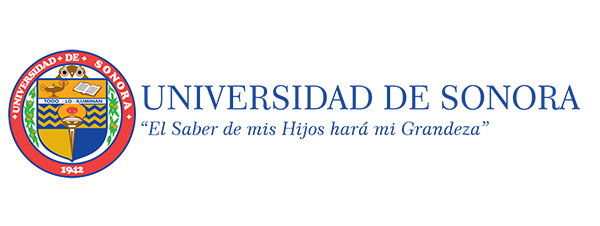 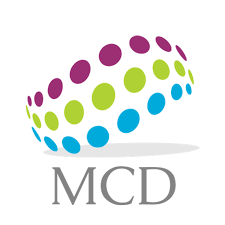

**Catherine Lee Scott Luévano**

Este análisis se centra en la producción pecuaria en México durante el periodo de 2013 a 2023. Utilizamos datos proporcionados por el Sistema de Información Agroalimentaria y Pesquera (SIAP) del Gobierno de México. El objetivo es examinar la producción de especies pecuarias específicas en ciertos municipios de interés.


Se recopilaron datos anuales en formato CSV desde el sitio web del SIAP, que incluye la producción de especies como bovinos, caprinos, porcinos, ovinos, aves y guajolotes. Los años abarcados en el análisis son del 2013 al 2023.

In [ ]:
import requests
import pandas as pd


# Lista de URLs de los archivos Excel
urls = [
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2013.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2014.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2015.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2016.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2017.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2018.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2019.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2020.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2021.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2022.csv',
    'http://infosiap.siap.gob.mx/gobmx/datosAbiertos/Estadist_Produc_Pecuaria/cierre_2023.csv'
]

Para el análisis, nos centramos en:

**Municipios Específicos:** Los datos se filtraron para incluir solo los municipios de Huepac, Ures, Aconchi, Arizpe, Banámichi, Baviácora, Cananea y San Felipe de Jesús, que fue donde hubo afectaciones por la contaminación del Rio Sonora

**Especies Permitidas:** Se incluyeron únicamente las especies bovino, caprino, porcino y ovino. Descartando Aves y Guajolotes.

In [ ]:
valores_cmun = ['Huepac', 'Ures', 'Aconchi', 'Arizpe', 'Banámichi', 'Baviácora ', 'Cananea', 'San Felipe de Jesús']

In [ ]:
especies_permitidas = ['Bovino', 'Caprino', 'Porcino', 'Ovino']


A continuación, se define una lista que almacenará los DataFrames filtrados de cada año. Luego, se implementa un bucle que recorrerá cada URL en la lista de datos, descargando y procesando los archivos CSV correspondientes a cada año. Durante este proceso, se extraerá el año del nombre del archivo y se realizará una solicitud HTTP para obtener los datos.

In [ ]:
# Lista para almacenar DataFrames filtrados
dataframes_filtrados = []

# Bucle para descargar y procesar cada archivo
for url in urls:
    # Extraer el año del nombre del archivo
    año = url.split('_')[-1].split('.')[0]
    nombre_archivo = f'ganaderia_{año}.csv'

    # Realizar la solicitud GET
    respuesta = requests.get(url)

**Filtrar por Municipio:** Se filtran los datos para incluir únicamente aquellos registros que pertenecen a los municipios de interés definidos previamente.

**Filtrar por Especies:** Se restringe el conjunto de datos a las especies de ganado especificadas.

**Eliminar Columnas No Necesarias:** Se eliminan columnas que no aportan información relevante para el análisis.

**Almacenar DataFrame Filtrado:** El DataFrame resultante se agrega a una lista para su posterior combinación.

**Guardar Datos Filtrados:**  Finalmente, se guarda el DataFrame filtrado como un nuevo archivo CSV, facilitando su uso en análisis futuros.

In [ ]:
    # Verificar si la solicitud fue exitosa
    if respuesta.status_code == 200:
        # Guardar el contenido del archivo
        with open(nombre_archivo, 'wb') as archivo:
            archivo.write(respuesta.content)
        print(f'Archivo descargado y guardado como {nombre_archivo}')

        # Cargar el archivo CSV en un DataFrame usando 'ISO-8859-1'
        ganaderia = pd.read_csv(nombre_archivo, encoding='ISO-8859-1')

        # Filtrar la tabla donde CMUN está en la lista especificada
        ganaderia_filtrada = ganaderia[ganaderia['Nommunicipio'].isin(valores_cmun)]

        # Mantener solo las especies permitidas
        ganaderia_filtrada = ganaderia_filtrada[ganaderia_filtrada['Nomespecie'].isin(especies_permitidas)]

        # Eliminar las columnas especificadas
        ganaderia_filtrada = ganaderia_filtrada.drop(columns=['Cveddr', 'Cveespecie', 'Peso', 'Asacrificado'])

        # Agregar el DataFrame filtrado a la lista
        dataframes_filtrados.append(ganaderia_filtrada)

        # Mostrar la tabla filtrada
        print(f'Tabla filtrada para el año {año}:')
        print(ganaderia_filtrada)

        # Guardar el DataFrame filtrado como CSV
        ganaderia_filtrada.to_csv(f'tabla_filtrada_{año}.csv', index=False)
        print(f'Tabla filtrada guardada como tabla_filtrada_{año}.csv')
    else:
        print(f'Error al descargar el archivo: {respuesta.status_code}')

# Realizar el merge de todos los DataFrames filtrados por 'Nommunicipio'
    if dataframes_filtrados:
      ganaderia_merge = pd.concat(dataframes_filtrados, ignore_index=True)

    # Guardar el DataFrame combinado como CSV
    ganaderia_merge.to_csv('ganaderia_merge.csv', index=False)
    print('Merge de todas las tablas guardado como ganaderia_merge.csv')

Archivo descargado y guardado como ganaderia_2023.csv
Tabla filtrada para el año 2023:
       Anio  Cveestado Nomestado       Nomddr  Cvempio         Nommunicipio  \
26294  2023         26    Sonora  Agua Prieta       19              Cananea   
26295  2023         26    Sonora  Agua Prieta       19              Cananea   
26296  2023         26    Sonora  Agua Prieta       19              Cananea   
26297  2023         26    Sonora  Agua Prieta       19              Cananea   
26691  2023         26    Sonora         Ures        1              Aconchi   
26692  2023         26    Sonora         Ures        1              Aconchi   
26693  2023         26    Sonora         Ures        1              Aconchi   
26694  2023         26    Sonora         Ures        1              Aconchi   
26695  2023         26    Sonora         Ures        1              Aconchi   
26696  2023         26    Sonora         Ures        1              Aconchi   
26697  2023         26    Sonora         Ure

Una vez que hemos realizado la combinación de los DataFrames filtrados, el siguiente paso es cargar el conjunto de datos combinado en un nuevo DataFrame. Este DataFrame contendrá la información de producción pecuaria para los municipios y especies de interés a lo largo de los años.

In [ ]:
import pandas as pd
ganaderia_merge = pd.read_csv('ganaderia_merge.csv')
ganaderia_merge

,Anio,Cveestado,Nomestado,Nomddr,Cvempio,Nommunicipio,Nomespecie,Cveproducto,Nomproducto,Volumen,Precio,Valor
0,2023,26,Sonora,Agua Prieta,19,Cananea,Bovino,1,Carne,1267.121,78.19,99073.071
1,2023,26,Sonora,Agua Prieta,19,Cananea,Bovino,3,Ganado en pie,2339.073,38.92,91045.515
2,2023,26,Sonora,Agua Prieta,19,Cananea,Ovino,1,Carne,1.620,83.00,134.461
3,2023,26,Sonora,Agua Prieta,19,Cananea,Ovino,3,Ganado en pie,3.230,40.70,131.457
4,2023,26,Sonora,Ures,1,Aconchi,Bovino,1,Carne,294.272,86.86,25559.390
5,2023,26,Sonora,Ures,1,Aconchi,Bovino,3,Ganado en pie,561.029,42.01,23567.659
6,2023,26,Sonora,Ures,1,Aconchi,Bovino,6,Leche,501.181,9.31,"4,663.52"
7,2023,26,Sonora,Ures,1,Aconchi,Ovino,1,Carne,0.989,70.46,69.683
8,2023,26,Sonora,Ures,1,Aconchi,Ovino,3,Ganado en pie,1.976,34.57,68.303
9,2023,26,Sonora,Ures,1,Aconchi,Porcino,1,Carne,373.212,46.25,17261.436


Para realizar un análisis detallado del conjunto de datos combinado, utilizaremos la biblioteca YData Profiling

In [ ]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c8a3ca320fee9226d7b9e7fdf03ed6a772096dd5a3ba25b1f2b32dcad832c250
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Una vez que hemos cargado el DataFrame combinado, procederemos a generar un informe de perfil utilizando la biblioteca YData Profiling. Este informe nos proporcionará una visión integral de los datos, incluyendo:

Estadísticas Descriptivas: Resúmenes de las variables numéricas y categóricas.
Distribuciones: Visualizaciones que muestran cómo se distribuyen los datos en cada columna.
Valores Faltantes: Un análisis de la cantidad y proporción de datos faltantes en el conjunto.
Correlaciones: Una evaluación de las relaciones entre las variables.


In [ ]:
from ydata_profiling import ProfileReport
ganaderia_profile = ProfileReport(ganaderia_merge, title="Reporte de ganaderia")

In [ ]:
ganaderia_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Una vez generado el informe de perfil de datos, es útil guardarlo en un archivo HTML. Esto permite compartir el informe de manera sencilla y visualizarlo en cualquier navegador web, facilitando así la revisión y el análisis de los resultados.

In [ ]:
ganaderia_profile.to_file("ganaderia_profilling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]